In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime
from dateutil.parser import parse
import csv

In [24]:
#virus_reps = pd.read_csv("https://covid.ourworldindata.org/data/who/full_data.csv")
virus_reps = pd.read_csv("data/coronavirus/full_data_2020-03-22.csv")
virus_reps['date'] = virus_reps['date'].astype('datetime64[ns]')
#virus_reps.set_index('date')
total_reps = virus_reps[['date', 'location', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths']]
total_reps.columns = ['Date', 'Location', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
#total_reps.plot.line()
total_reps.head()
type(total_reps)

pandas.core.frame.DataFrame

In [25]:
total_reps_us = total_reps.query("Location == 'United States'")
total_reps_us.columns = ['Date', 'Location', 'US New Cases', 'US New Deaths', 'US Total Cases', 'US Total Deaths']
del total_reps_us['Location']
#total_reps_us.set_index('Date')
#total_reps_us.plot(kind='line')
#print(total_reps_us)

total_reps_china = total_reps.query("Location == 'China'")
total_reps_china.columns = ['Date', 'Location', 'China New Cases', 'China New Deaths', 'China Total Cases', 'China Total Deaths']
del total_reps_china['Location']
#total_reps_china.set_index('Date')
#print(total_reps_china)
#total_reps_china.plot(kind='line')

total_reps_sk = total_reps.query("Location == 'South Korea'")
total_reps_sk.columns = ['Date', 'Location', 'SK New Cases', 'SK Deaths', 'SK Total Cases', 'SK Total Deaths']
del total_reps_sk['Location']
#total_reps_sk.set_index('Date')
#print(total_reps_sk)
#total_reps_sk.plot(kind='line')

total_reps_italy = total_reps.query("Location == 'Italy'")
total_reps_italy.columns = ['Date', 'Location', 'Italy New Cases', 'Italy New Deaths', 'Italy Total Cases', 'Italy Total Deaths']
del total_reps_italy['Location']
#total_reps_italy.set_index('Date')
#print(total_reps_italy)
#total_reps_italy.plot(kind='line')


#total_reps_us.dtypes
total_reps_china.head()

,Date,China New Cases,China New Deaths,China Total Cases,China Total Deaths
1121,2019-12-31,27,0,27,0
1122,2020-01-01,0,0,27,0
1123,2020-01-02,0,0,27,0
1124,2020-01-03,17,0,44,0
1125,2020-01-04,0,0,44,0


In [26]:
#merge individual country dataframes
us_china = pd.merge(total_reps_us, total_reps_china, how='inner', on='Date', sort=True)
us_china_sk = pd.merge(us_china, total_reps_sk, how='inner', on='Date', sort=True)
us_china_sk_italy = pd.merge(us_china_sk, total_reps_italy, how='inner', on='Date', sort=True)

In [7]:
us_china_sk_italy.head(100)

,Date,US New Cases,US New Deaths,US Total Cases,US Total Deaths,China New Cases,China New Deaths,China Total Cases,China Total Deaths,SK New Cases,SK Deaths,SK Total Cases,SK Total Deaths,Italy New Cases,Italy New Deaths,Italy Total Cases,Italy Total Deaths
0,2019-12-31,0,0,0,0,27,0,27,0,0,0,0,0,0,0,0,0
1,2020-01-01,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0
2,2020-01-02,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0
3,2020-01-03,0,0,0,0,17,0,44,0,0,0,0,0,0,0,0,0
4,2020-01-04,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2020-03-17,887,16,4661,85,110,9,81130,3226,84,6,8320,81,4000,347,27980,2158
78,2020-03-18,1766,23,6427,108,33,16,81163,3242,93,5,8413,86,3526,347,31506,2505
79,2020-03-19,2988,42,9415,150,75,8,81238,3250,152,5,8565,91,4207,473,35713,2978
80,2020-03-20,4835,0,14250,150,99,4,81337,3254,87,9,8652,100,5322,429,41035,3407


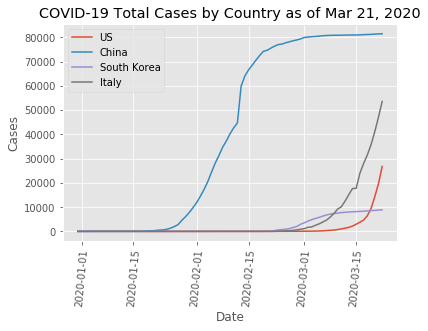

In [27]:
plt.style.use('ggplot')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['US Total Cases'], label='US')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['China Total Cases'], label='China')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['SK Total Cases'], label='South Korea')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['Italy Total Cases'], label='Italy')
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Cases by Country as of Mar 21, 2020')
plt.ylabel('Cases')
plt.xlabel('Date')
#plt.show()
plt.savefig('COVID-2020-03-20.png', bbox_inches='tight', pad_inches=0.2)

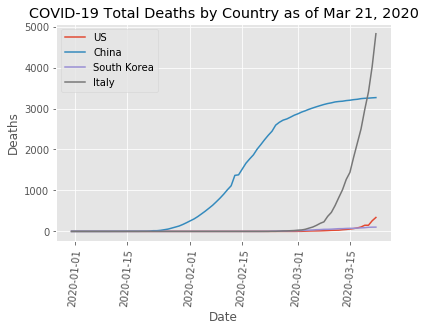

In [28]:
plt.style.use('ggplot')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['US Total Deaths'], label='US')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['China Total Deaths'], label='China')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['SK Total Deaths'], label='South Korea')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['Italy Total Deaths'], label='Italy')
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Deaths by Country as of Mar 21, 2020')
plt.ylabel('Deaths')
plt.xlabel('Date')
#plt.show()
plt.savefig('COVID-2020-03-21d.png', bbox_inches='tight', pad_inches=0.2)

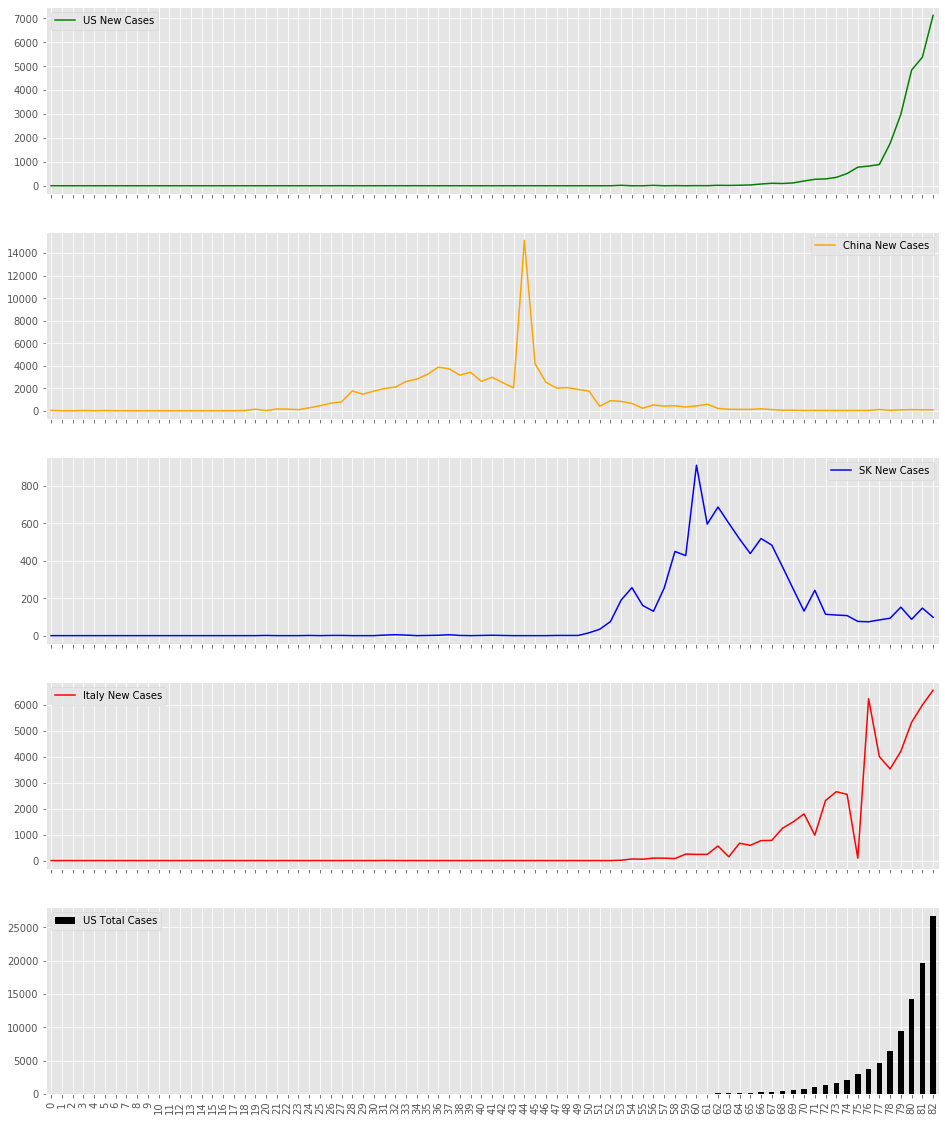

In [30]:
#%matplotlib inline
# Figure named 'fig' with axes (subplots in a 5 row x 1 col arrangement) with an overall figure size of 16 wide by 20 high and a shared x-axis
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16,20), sharex=True)
#plt.axis('')
us_tc = us_china_sk_italy[['US Total Cases']]
us_cases = us_china_sk_italy[['US New Cases']]
china_cases = us_china_sk_italy[['China New Cases']]
sk_cases = us_china_sk_italy[['SK New Cases']]
italy_cases = us_china_sk_italy[['Italy New Cases']]
# axes[0] = first plot, if there were two columns it would be axes[0,0]
ax1=us_cases.plot(ax=axes[0], color='green', kind='line')
# axes[1] = first plot
ax2=china_cases.plot(ax=axes[1], color='orange', kind='line')
# axes[2] = second plot
ax3=sk_cases.plot(ax=axes[2], color='blue', kind='line')
# axes[3] = third plot
ax4=italy_cases.plot(ax=axes[3], color='red', kind='line')
# axes[4] = fifth plot
ax5=us_tc.plot(ax=axes[4], color='black', kind='bar')
#ax5.xaxis.set_major_locator(mpl_dates.DayLocator(interval=4))
#ax5.xaxis.set_minor_locator(mpl_dates.DayLocator())
#ax5.xaxis.set_major_formatter(mpl_dates.DateFormatter('%b %d'))

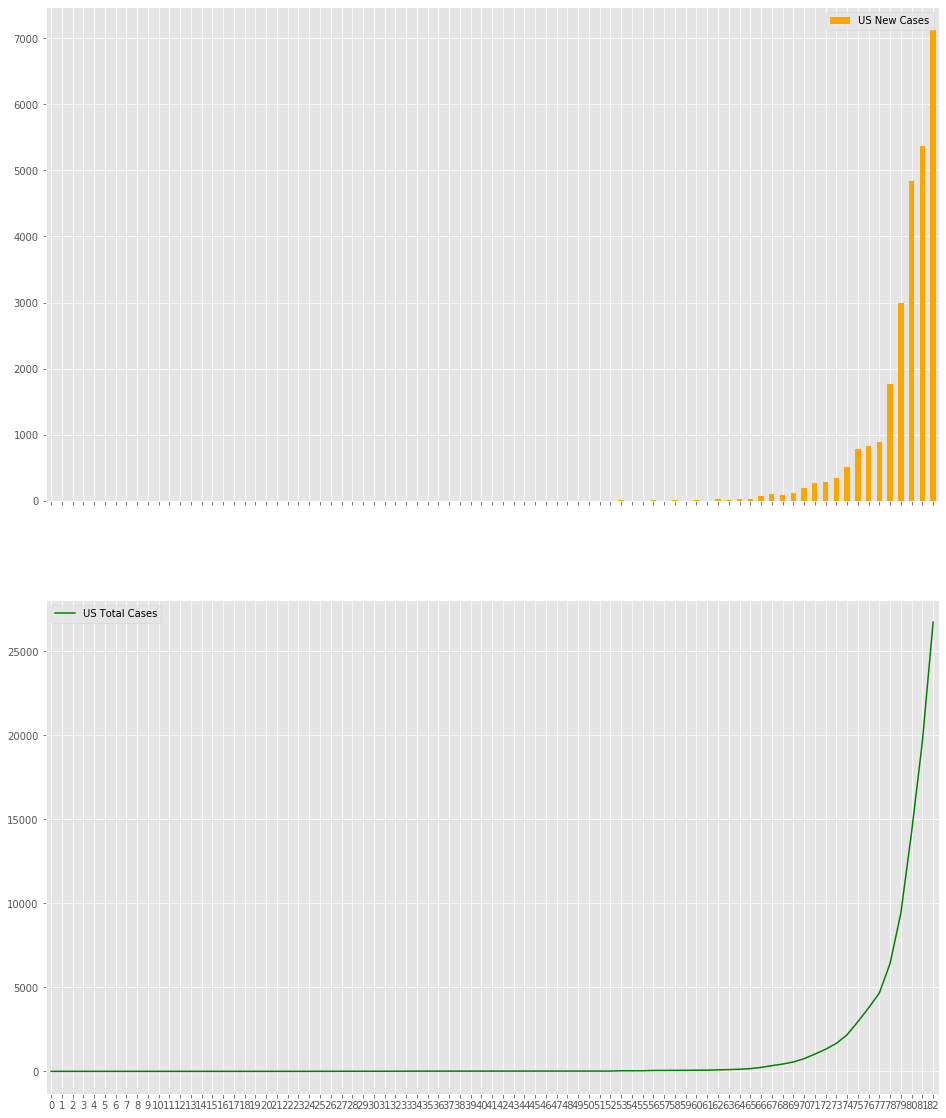

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
us_tc = us_china_sk_italy[['US Total Cases']]
us_cases = us_china_sk_italy[['US New Cases']]
ax1=us_cases.plot(ax=axes[0], color='orange', kind='bar')
ax2=us_tc.plot(ax=axes[1], color='green', kind='line')
ax1.

Location
Afghanistan            AxesSubplot(0.125,0.570909;0.775x0.309091)
Albania                AxesSubplot(0.125,0.570909;0.775x0.309091)
Algeria                AxesSubplot(0.125,0.570909;0.775x0.309091)
Andorra                AxesSubplot(0.125,0.570909;0.775x0.309091)
Antigua and Barbuda    AxesSubplot(0.125,0.570909;0.775x0.309091)
                                          ...                    
Vatican                AxesSubplot(0.125,0.570909;0.775x0.309091)
Venezuela              AxesSubplot(0.125,0.570909;0.775x0.309091)
Vietnam                AxesSubplot(0.125,0.570909;0.775x0.309091)
World                  AxesSubplot(0.125,0.570909;0.775x0.309091)
Zambia                 AxesSubplot(0.125,0.570909;0.775x0.309091)
Length: 168, dtype: object

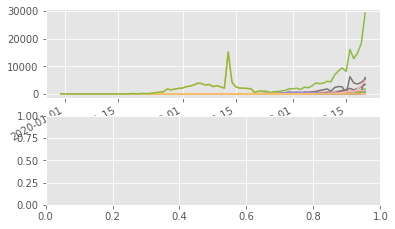

In [83]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

total_reps.groupby('Location').plot(x='Date', y='New Cases', ax=ax1, legend=False)
#total_reps.groupby('Location').plot(y='Total Cases', kind='bar', ax=ax2)

In [10]:
us_china_sk_italy.set_index('Date', inplace=True)

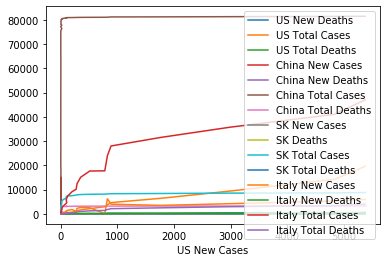

In [15]:
#fig1 = plt.figure(1, figsize=(20, 4.8))
# Divide the figure into a 2x1 grid, and give me the first section
#chart1 = fig1.add_subplot(211)
# Divide the figure into a 2x1 grid, and give me the second section
#chart2 = fig1.add_subplot(212)
#
fig1 = us_china_sk_italy.plot('US New Cases', kind='line')
#fig1 = us_china_sk_italy.plot(us_china_sk_italy.index, 'US Total Cases', kind='bar')
#fig1.xticks('Date'[::10])
#fig1.set_ylabel('Cases')
#fig1.set_title('This is my Title')
#fig1.xaxis.set_major_locator(mpl_dates.DayLocation(interval=5))
#fig1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%m-%Y'))
#fig1.
#plt.gcf().autofmt_xdate()
plt.show()

0    2019-12-31
10   2020-01-10
20   2020-01-20
30   2020-01-30
40   2020-02-09
50   2020-02-19
60   2020-02-29
70   2020-03-10
80   2020-03-20
Name: Date, dtype: datetime64[ns]


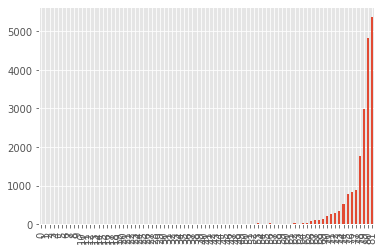

In [173]:
#us_china_sk_italy.plot('Date', 'US Total Cases', kind='bar')
us_china_sk_italy['US New Cases'].plot.bar()
#print(us_china_sk_italy['Date'][::10])
#fig1.xaxis.set_major_locator(mpl_dates.DayLocation(interval=5))
#fig1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%m-%Y'))
#fig1.
#plt.gcf().autofmt_xdate()
plt.show()